## Import

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

In [2]:
from ML.utils.utils import *
from ML.utils.Data_preparator import Data_preparator
from ML.utils.Model_evaluator import Model_evaluator
from physics.Iso_data_handler import Iso_data_handler
from physics.Data_visualiser import Data_visualiser

In [ ]:
physical_model = "MIST"
path_to_data = "../../../../../../data/MIST_v1.2_vvcrit0.0_basic_isos/"
path_to_results = "../../../../../../results/K_fold/"
path_to_predictions = "../../../../../../predictions/K_fold"
tag = "log_g_filtered_bigger_1"

## Data preparation

This notebook contains the results of the model which are trained using all the data from MIST and filtered on the phases

Reading MIST dataframe from csv file...


,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R
0,5.0,3.486221,3.131342,-1.0,-0.25,0.100000,0.153402
1,5.0,3.487362,3.126808,-1.0,-0.25,0.102645,0.160326
2,5.0,3.489243,3.119367,-1.0,-0.25,0.107039,0.171785
3,5.0,3.491102,3.112165,-1.0,-0.25,0.111419,0.183099
4,5.0,3.492937,3.105143,-1.0,-0.25,0.115789,0.194305
...,...,...,...,...,...,...,...
1467117,10.3,4.402490,7.777159,6.0,0.50,0.532726,-1.806255
1467118,10.3,4.387132,7.783242,6.0,0.50,0.532730,-1.809295
1467119,10.3,4.371789,7.789130,6.0,0.50,0.532735,-1.812237
1467120,10.3,4.356480,7.794844,6.0,0.50,0.532741,-1.815091


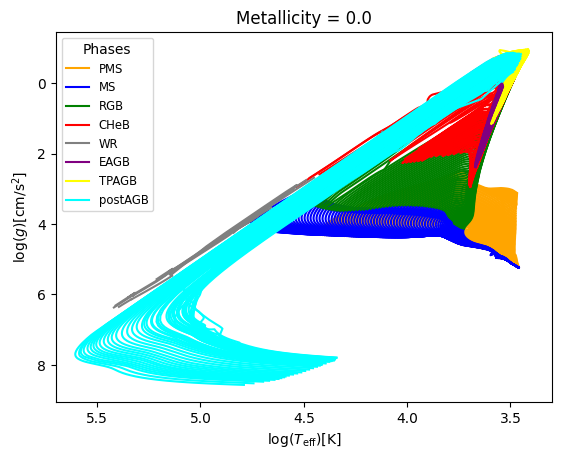

In [ ]:
iso_handler = Iso_data_handler(path_to_data, 
                              ['log10_isochrone_age_yr', 'log_Teff', 'log_g', 'phase', 'metallicity', 'star_mass', 'log_R'], 
                              physical_model, reclassify=True)

iso_df = iso_handler.get_isochrone_dataframe()
display(iso_df)
data_visualiser = Data_visualiser(iso_df, physical_model)
data_visualiser.plot_Kiel([], [0.0])

In [4]:
print_uniques("log_g", iso_df)
# print_uniques_count("log_g", iso_df)

log_g : 1467122 unique values, range [-1.14489780699774, 8.654432637941216]


,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R
0,5.0,4.494412,4.346972,0.0,-0.25,13.584360,0.610679
1,5.0,4.497517,4.345776,0.0,-0.25,13.765512,0.614753
2,5.0,4.500556,4.344580,0.0,-0.25,13.942887,0.618755
3,5.0,4.504040,4.343050,0.0,-0.25,14.591712,0.624670
4,5.0,4.507576,4.341483,0.0,-0.25,15.426062,0.631187
...,...,...,...,...,...,...,...
1140739,10.3,3.425746,-0.551440,5.0,0.50,0.602856,2.384899
1140740,10.3,3.426469,-0.560350,5.0,0.50,0.598549,2.387797
1140741,10.3,3.427744,-0.566057,5.0,0.50,0.594116,2.389036
1140742,10.3,3.429413,-0.569225,5.0,0.50,0.589648,2.388981


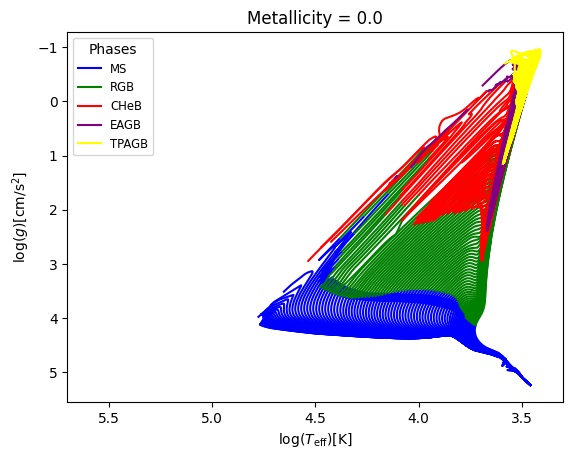

In [ ]:
phase_filtered_iso_df = Data_preparator.filter_data(iso_df, {'phase':[0, 2, 3, 4, 5]})
display(phase_filtered_iso_df)
data_visualiser_phase_filtered = Data_visualiser(phase_filtered_iso_df, physical_model)
data_visualiser_phase_filtered.plot_Kiel([], [0.0])

In [6]:
print_uniques("log_g", phase_filtered_iso_df)
# print_uniques_count("log_g", phase_filtered_iso_df)

log_g : 1140744 unique values, range [-1.14489780699774, 6.259434356871683]


,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R
0,5.0,4.494412,4.346972,0.0,-0.25,13.584360,0.610679
1,5.0,4.497517,4.345776,0.0,-0.25,13.765512,0.614753
2,5.0,4.500556,4.344580,0.0,-0.25,13.942887,0.618755
3,5.0,4.504040,4.343050,0.0,-0.25,14.591712,0.624670
4,5.0,4.507576,4.341483,0.0,-0.25,15.426062,0.631187
...,...,...,...,...,...,...,...
676289,10.3,3.548780,1.089622,4.0,0.50,0.864100,1.642531
676290,10.3,3.547387,1.070611,4.0,0.50,0.864020,1.652016
676291,10.3,3.545978,1.051561,4.0,0.50,0.863938,1.661521
676292,10.3,3.544593,1.032569,4.0,0.50,0.863855,1.670996


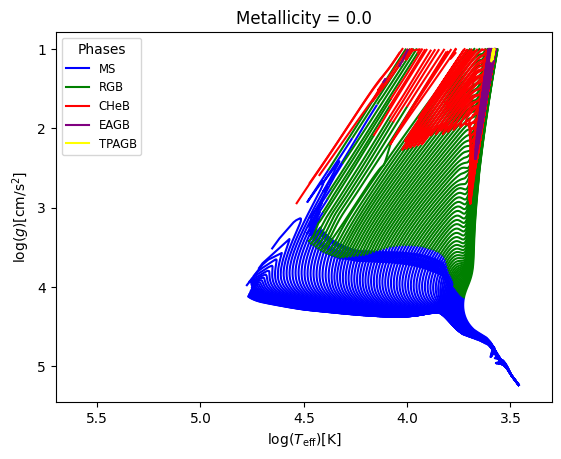

In [ ]:
phase_log_g_filtered_iso_df = Data_preparator.filter_data(iso_df, {'phase':[0, 2, 3, 4, 5], "log_g" : (">", 1)})
display(phase_log_g_filtered_iso_df)
data_visualiser_phase_age_filtered = Data_visualiser(phase_log_g_filtered_iso_df, physical_model)
data_visualiser_phase_age_filtered.plot_Kiel([], [0.0])

In [13]:
X_train, X_ivs, y_train, y_ivs = \
    Data_preparator.split_data(phase_log_g_filtered_iso_df, x_cols=['log10_isochrone_age_yr', 'log_Teff', 'log_g', 'metallicity'], 
                               y_cols=['star_mass', 'log_R'], random_state=12, print_stats=True)

print(X_train.shape, X_ivs.shape)
print(y_train.shape, y_ivs.shape)

Training set statistics:
Range in train data for the mass parameter : 0.099998052173157 - 298.5447575808816
Median value in train data for the mass parameter: 2.7177438939913796
Mean value in train data for the mass parameter: 10.80929064044624
Range in train data for the radius parameter : -0.9974747647513328 - 2.7446161135652143
Median value in train data for the radius parameter: 0.7708717021877387
Mean value in train data for the radius parameter: 0.7585998430186908

Testing set statistics:
Range in test data for the mass parameter : 0.0999979840073621 - 296.5221171165397
Median value in test data for the mass parameter: 2.731912069498406
Mean value in test data for the mass parameter: 10.744663726571664
Range in test data for the radius parameter : -0.9973627769638856 - 2.746234419158992
Median value in test data for the radius parameter: 0.7717137279787416
Mean value in test data for the radius parameter: 0.7585665592041747

(507220, 4) (169074, 4)
(507220, 2) (169074, 2)


## Model training

### Linear regression

In [ ]:
lr_evaluator = Model_evaluator("linear_regression", path=path_to_results, physical_model=physical_model)


log_g_filtered_smaller_4 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.41416299184181227
RMSE :  15.506265023718633
MAE :  6.503096929075639
MedAE :  3.2485347064383254
CORR :  0.6435549643636274
MAX_ER :  245.40754105028248
Percentiles : 
  75th percentile :  6.586804166284581
  90th percentile :  15.28605988812269
  95th percentile :  20.6405137917398
  99th percentile :  57.494170904608836



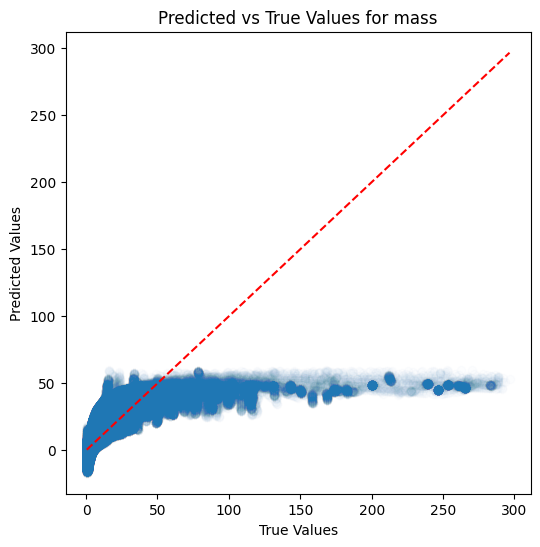

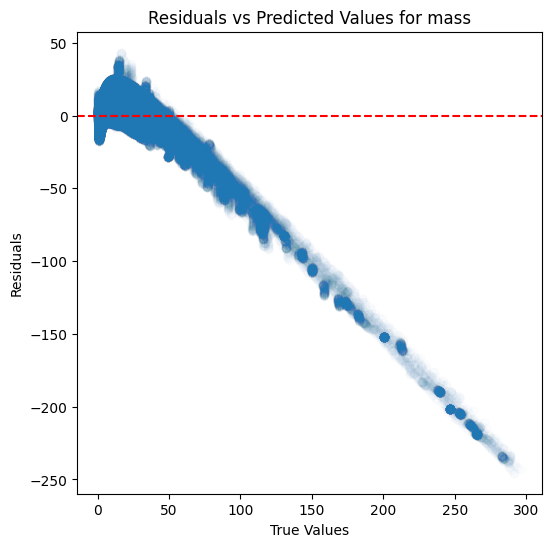

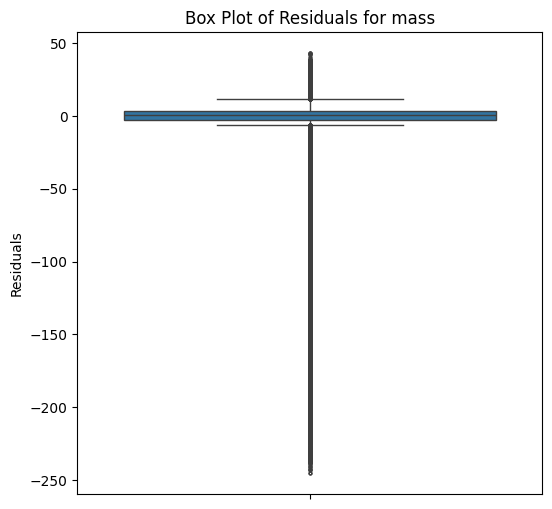

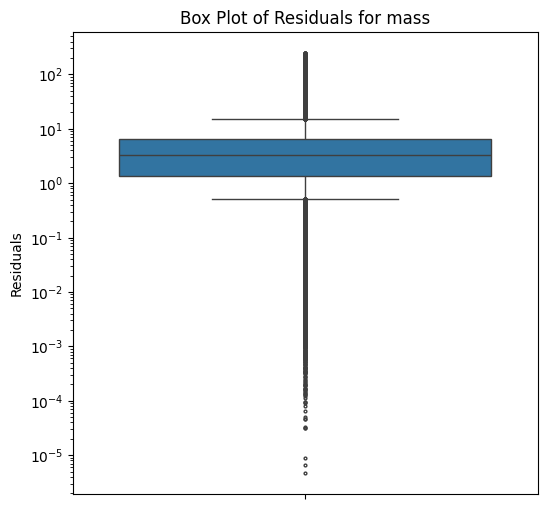

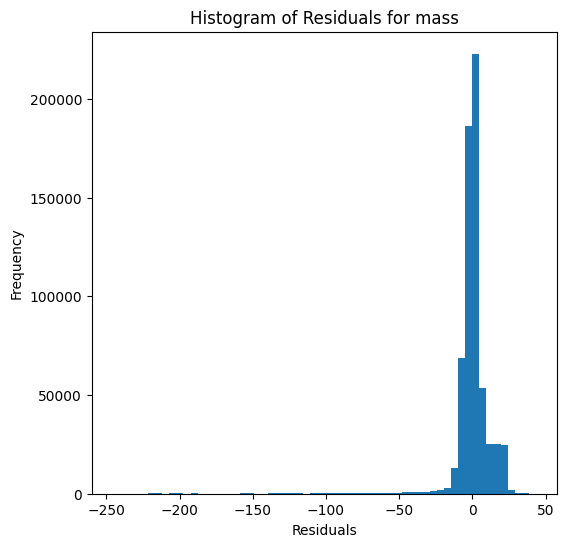

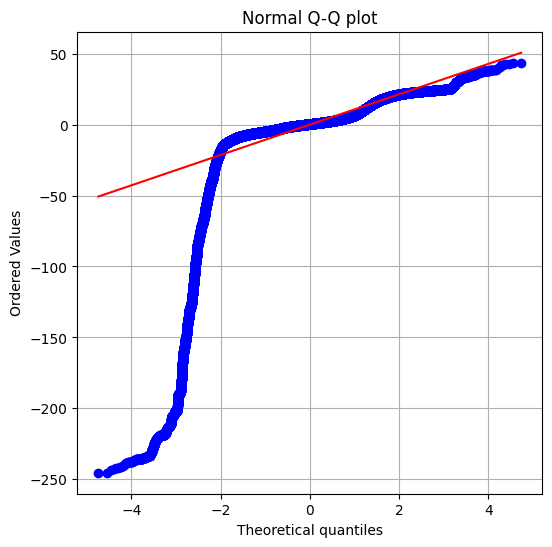


radius results:
RVE :  0.9889191126064973
RMSE :  0.06918299441192666
MAE :  0.046471670689605435
MedAE :  0.03219591300551006
CORR :  0.9944441224154014
MAX_ER :  0.5013446621725519
Percentiles : 
  75th percentile :  0.05873141061966769
  90th percentile :  0.10297214230377279
  95th percentile :  0.14126009353646846
  99th percentile :  0.2650766475983026



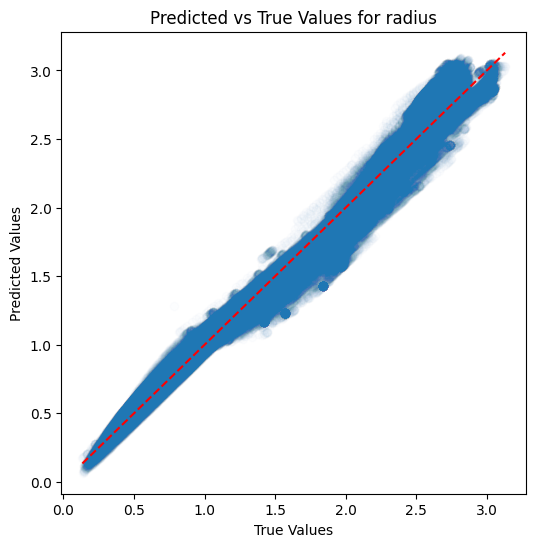

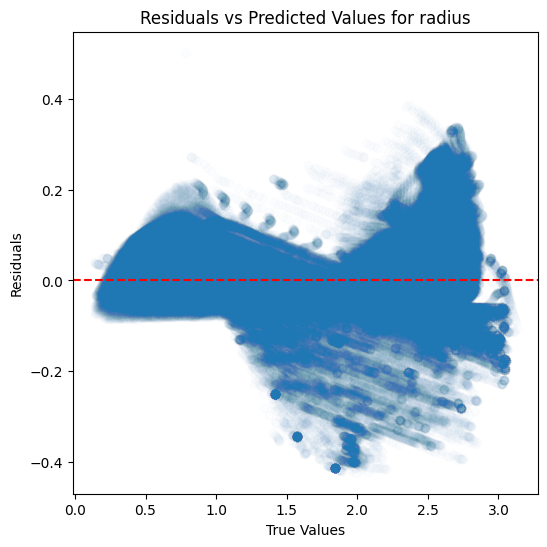

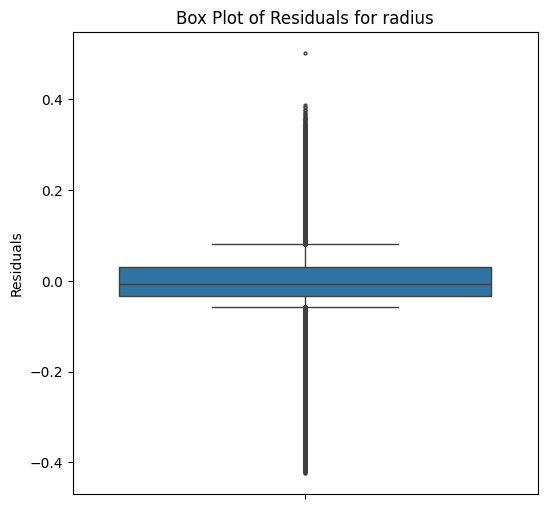

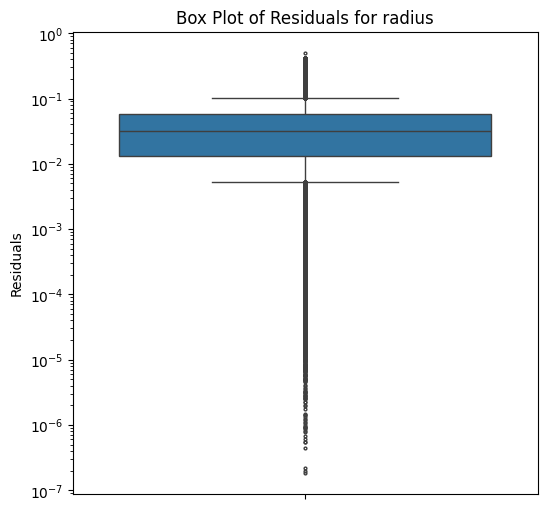

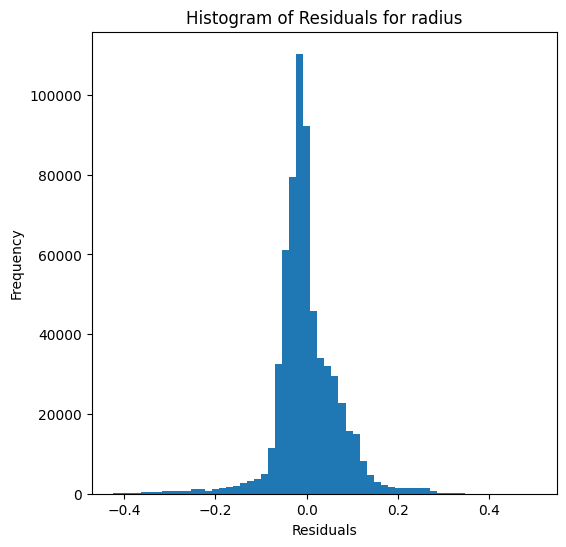

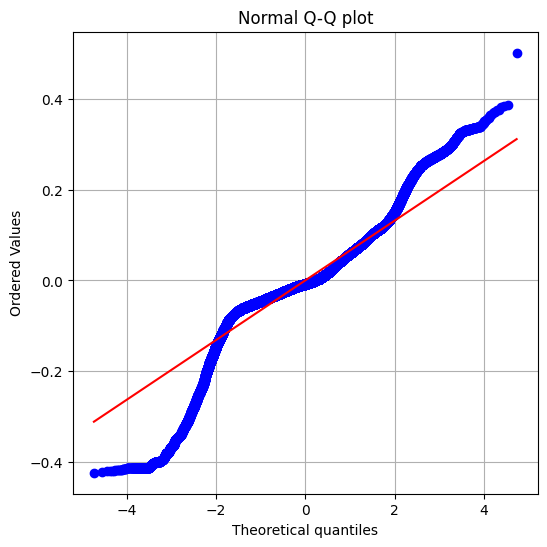

In [ ]:
lr_evaluator.evaluate_Kfold_results(LinearRegression, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False) #, override=False, use_preds=True)

### Decision tree

In [ ]:
dt_evaluator = Model_evaluator("decision_tree", path=path_to_results, physical_model=physical_model)

In [ ]:
dt_evaluator.evaluate_Kfold_results(DecisionTreeRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False) #, override=False, use_preds=True)


log_g_filtered_smaller_4 train data :
split 1 2 3 4 5 6 

### K-nearest neighbours

In [ ]:
knn_evaluator = Model_evaluator("KNN", path=path_to_results, physical_model=physical_model)


mass_filtered_smaller_3 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9851591018183086
RMSE :  0.08418684913784176
MAE :  0.040326938588368416
MedAE :  0.010978932468380997
CORR :  0.9925519255441945
MAX_ER :  1.5919104638650627
Percentiles : 
  75th percentile :  0.04252106198976002
  90th percentile :  0.11842541674209571
  95th percentile :  0.18504575839212567
  99th percentile :  0.3574981991975417



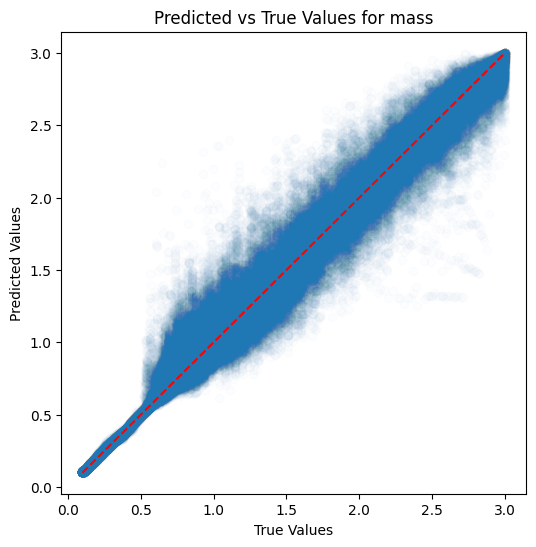

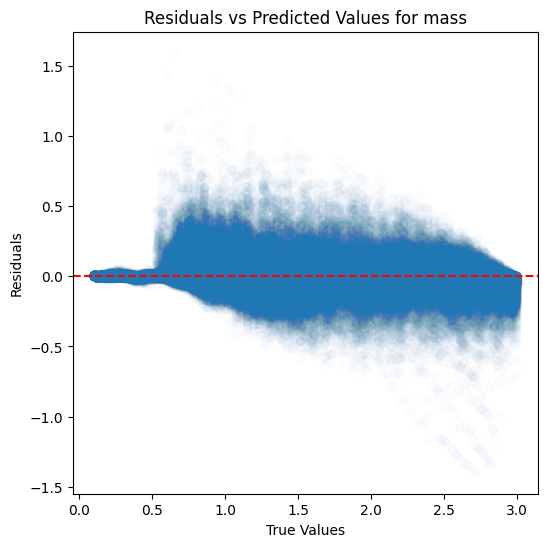

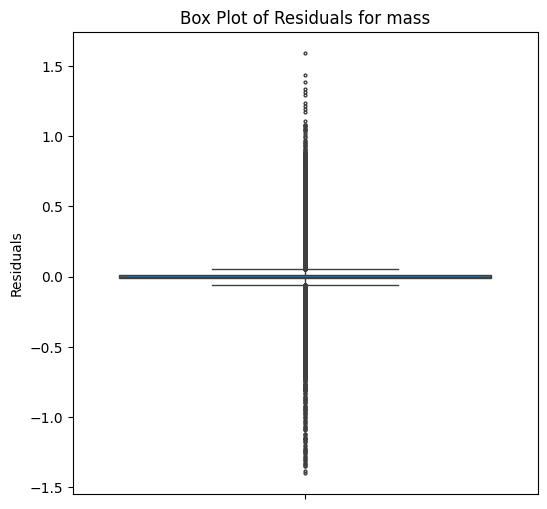

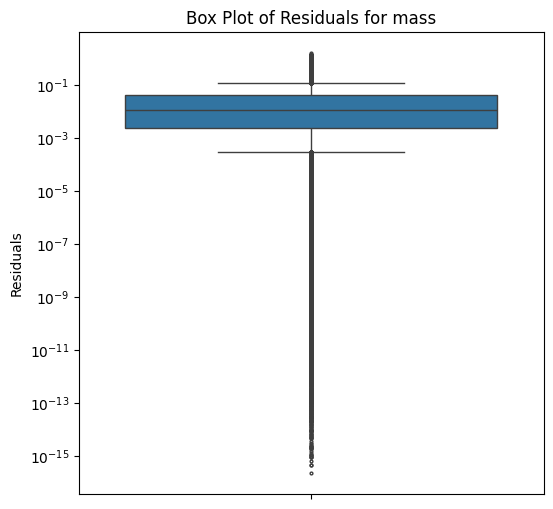

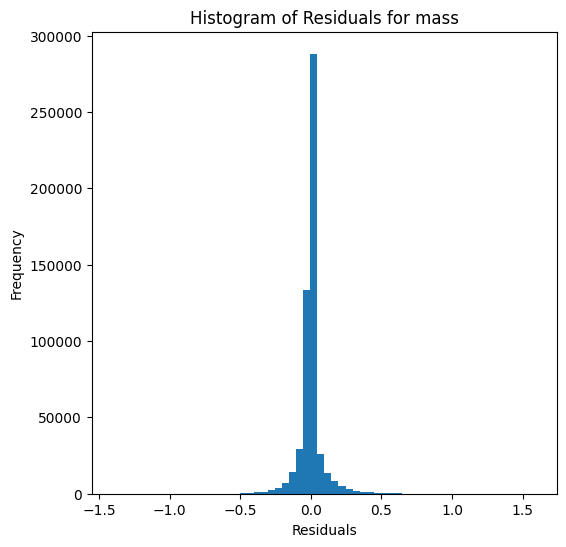

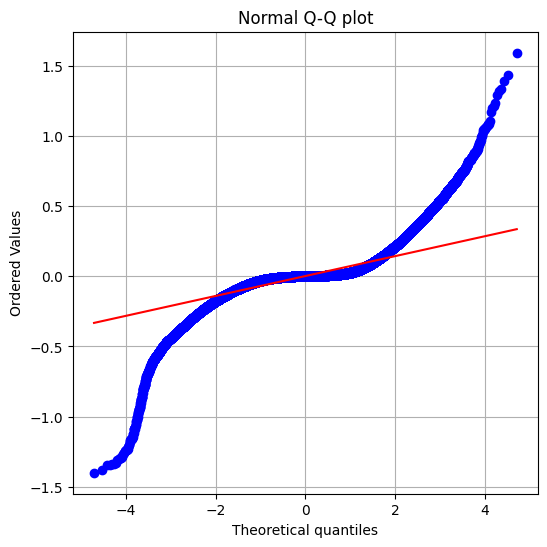


radius results:
RVE :  0.9998124002057707
RMSE :  0.014019621430573385
MAE :  0.007597533419531711
MedAE :  0.0034485702594244105
CORR :  0.999906207529898
MAX_ER :  0.26087605719507456
Percentiles : 
  75th percentile :  0.008594314484754478
  90th percentile :  0.019346486803666536
  95th percentile :  0.03016623615763068
  99th percentile :  0.05843496638138132



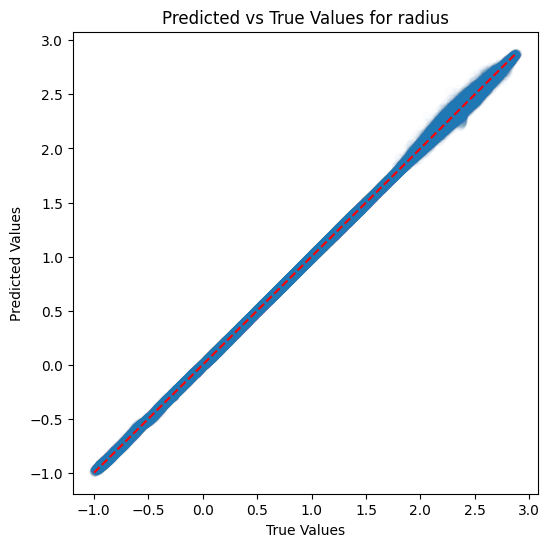

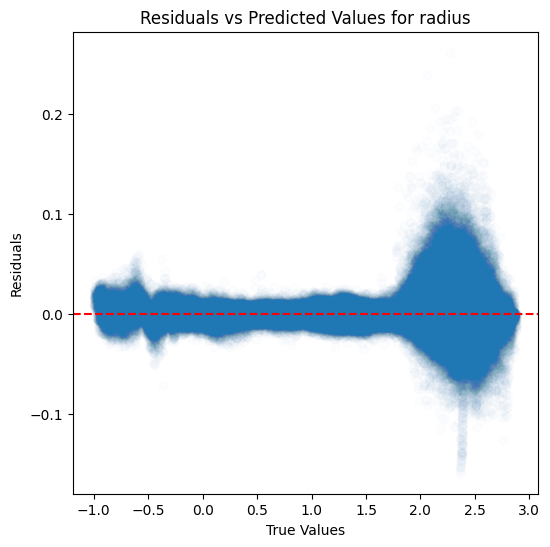

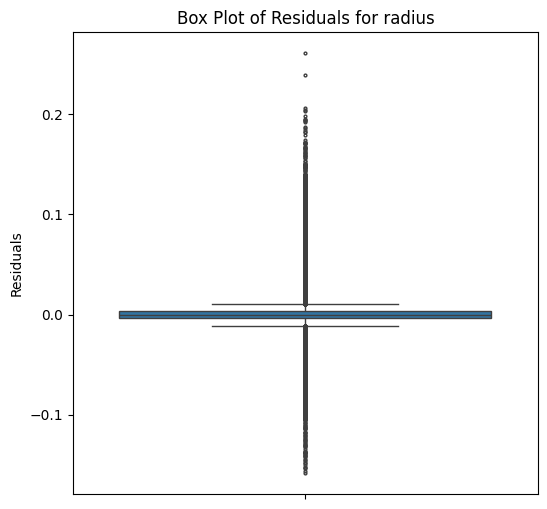

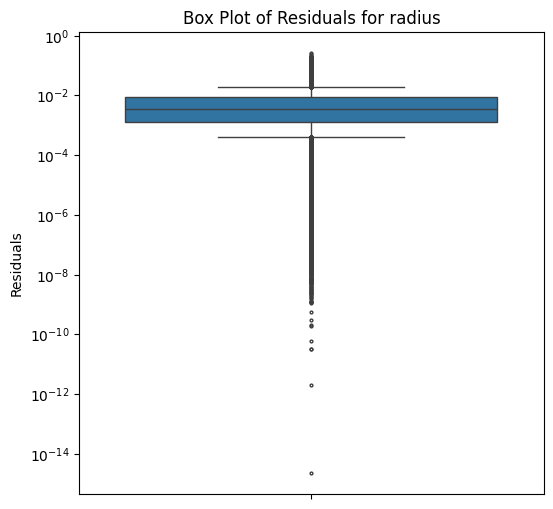

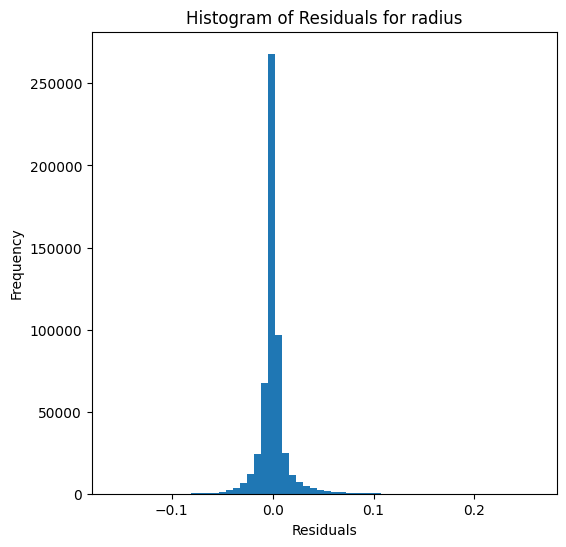

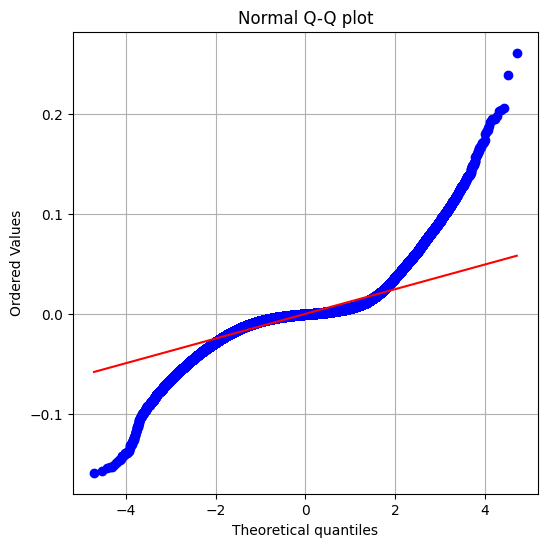

In [ ]:
knn_evaluator.evaluate_Kfold_results(KNeighborsRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False) #, override=False, use_preds=True)

### Random forests

In [ ]:
rf_evaluator = Model_evaluator("random_forest", path=path_to_results, physical_model=physical_model)


mass_filtered_smaller_3 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9921007066355249
RMSE :  0.06141520595143782
MAE :  0.02741767026556641
MedAE :  0.006514018296374546
CORR :  0.9960429814270274
MAX_ER :  1.635305433062047
Percentiles : 
  75th percentile :  0.02696381660828412
  90th percentile :  0.07860996835074398
  95th percentile :  0.1282753374377581
  99th percentile :  0.26601105702515954



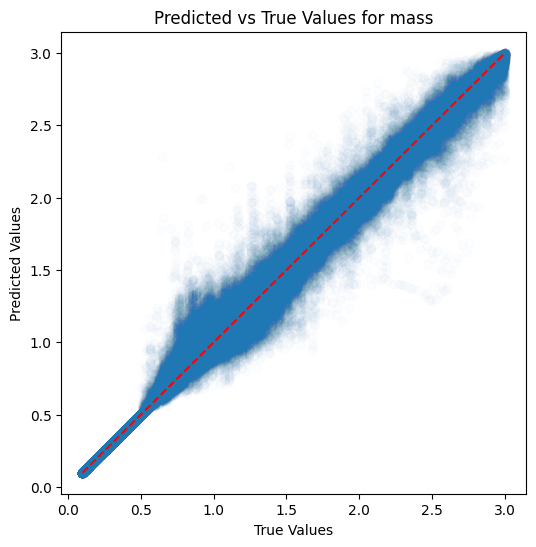

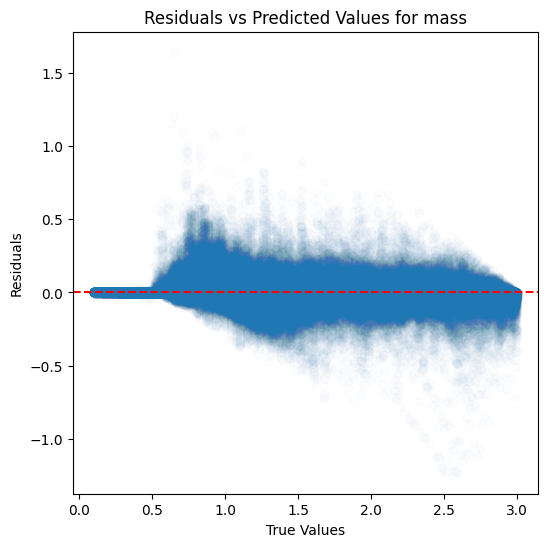

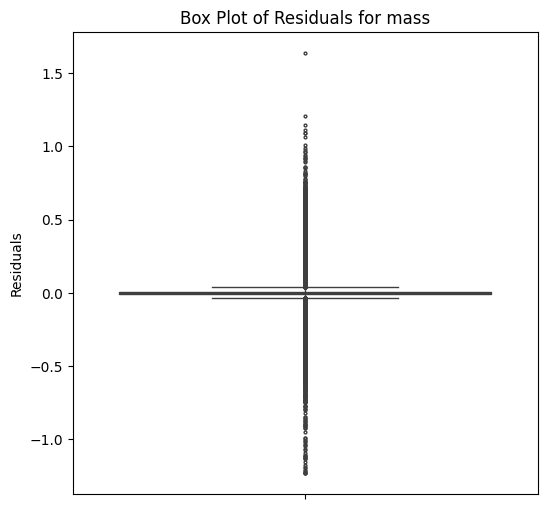

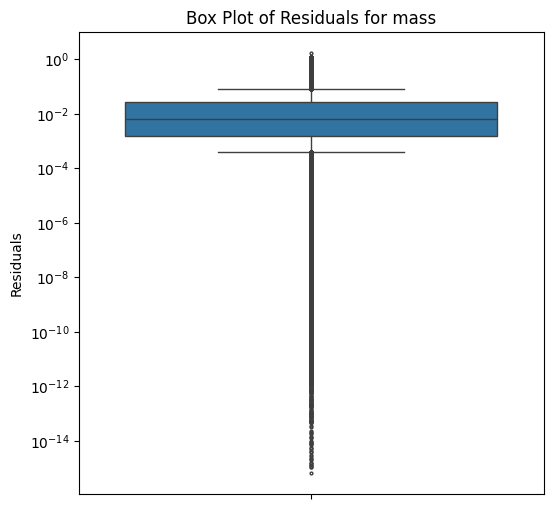

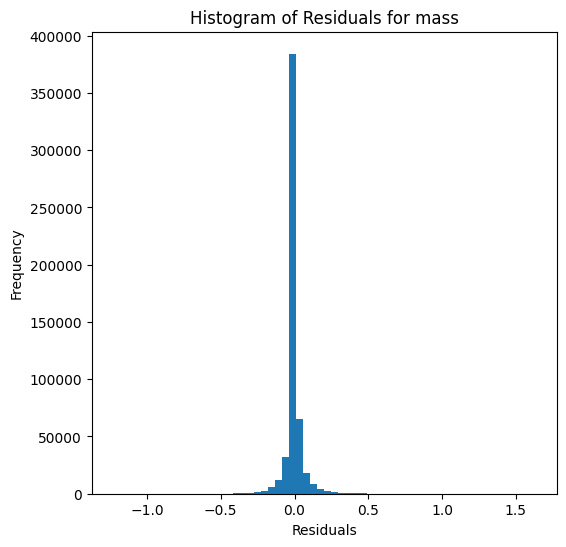

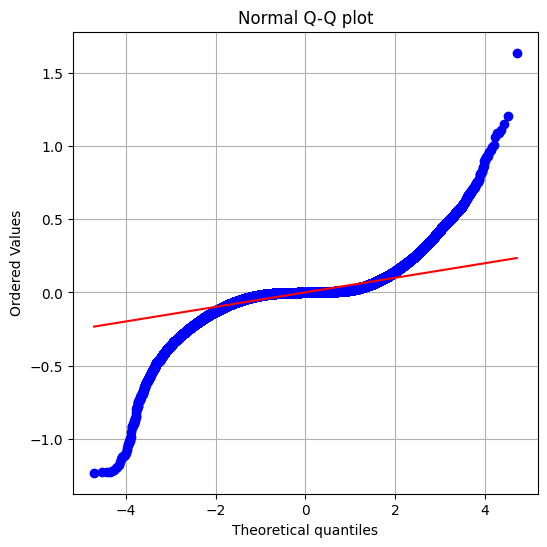


radius results:
RVE :  0.9998952156558059
RMSE :  0.010476065091138284
MAE :  0.005087489633142531
MedAE :  0.0018548895212230708
CORR :  0.9999476181402057
MAX_ER :  0.2375985416469213
Percentiles : 
  75th percentile :  0.00537074164852136
  90th percentile :  0.013183575852084585
  95th percentile :  0.021255410456846403
  99th percentile :  0.04618027187235004



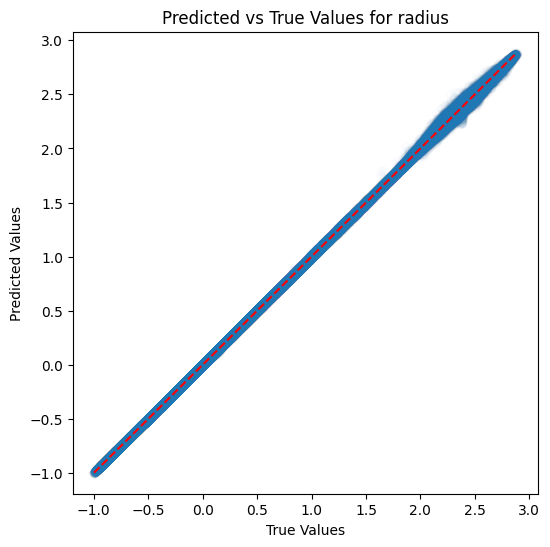

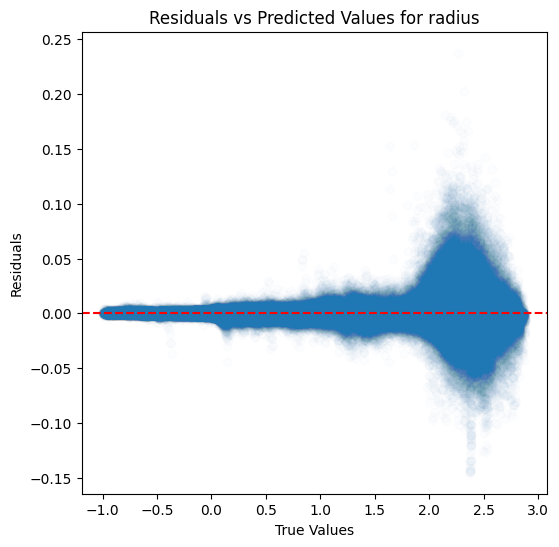

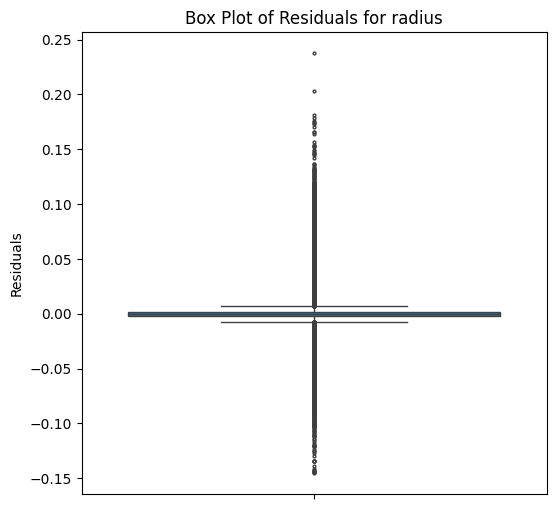

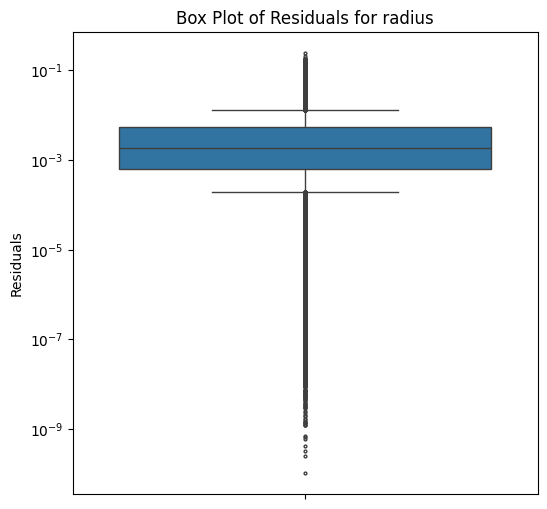

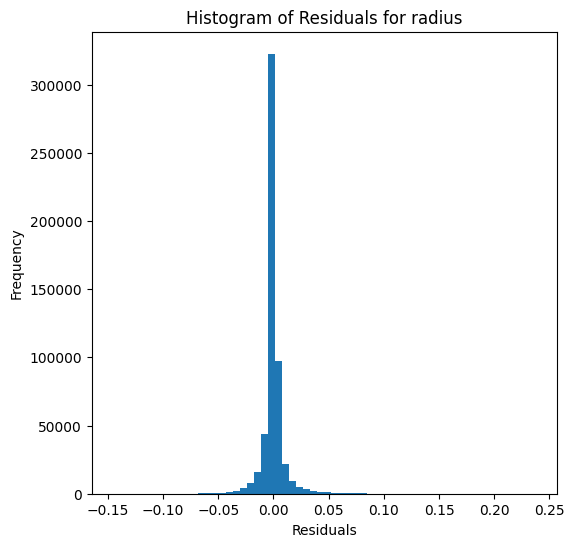

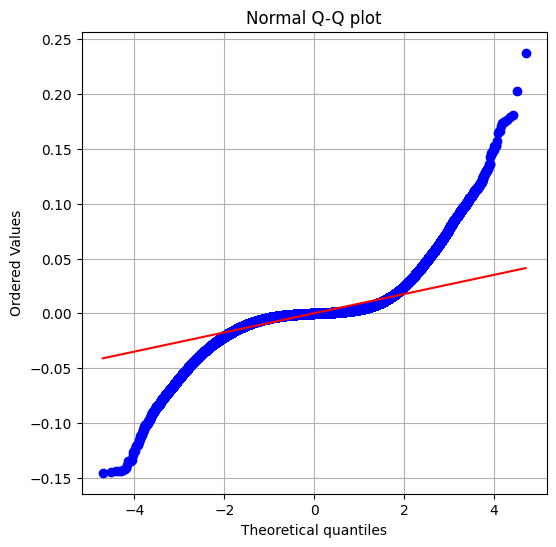

In [ ]:
rf_evaluator.evaluate_Kfold_results(RandomForestRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False, n_jobs=5) #, override=False, use_preds=True)

### XGBoost

In [ ]:
xgb_evaluator = Model_evaluator("xgboost", path=path_to_results, physical_model=physical_model)


mass_filtered_smaller_3 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9823167084494933
RMSE :  0.09188510564815897
MAE :  0.05454334245066164
MedAE :  0.026503506362566043
CORR :  0.9911192313182378
MAX_ER :  1.1615402437900189
Percentiles : 
  75th percentile :  0.06810591620228007
  90th percentile :  0.14006342367135535
  95th percentile :  0.2073085947517214
  99th percentile :  0.3570443102833985



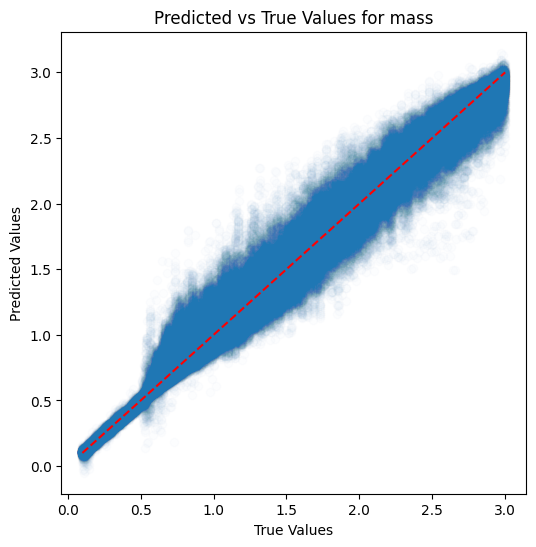

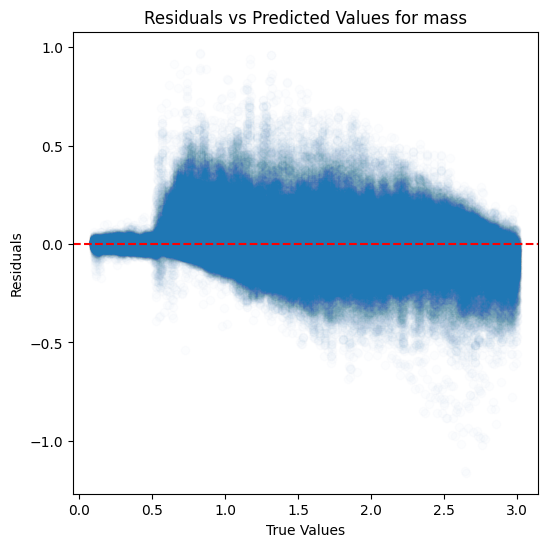

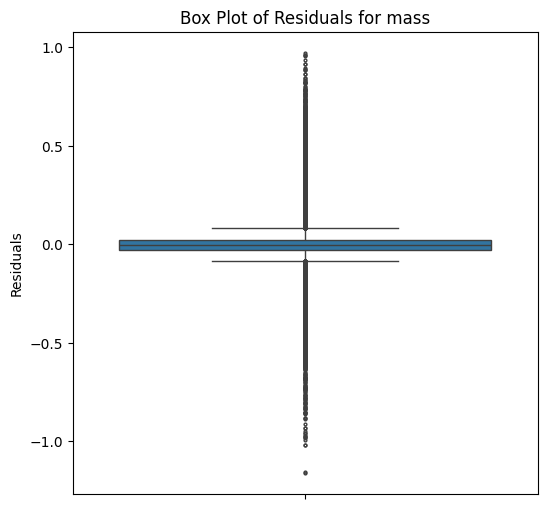

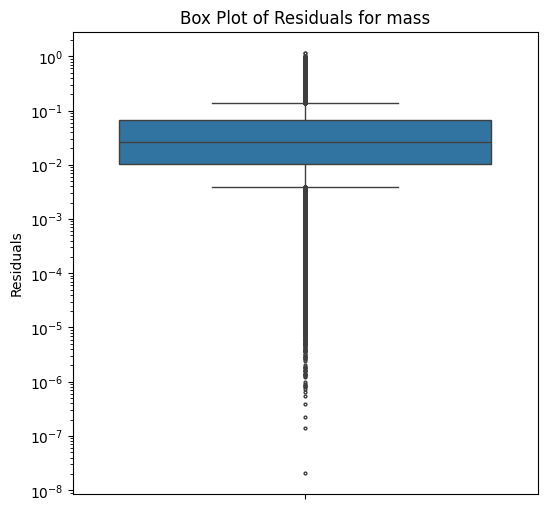

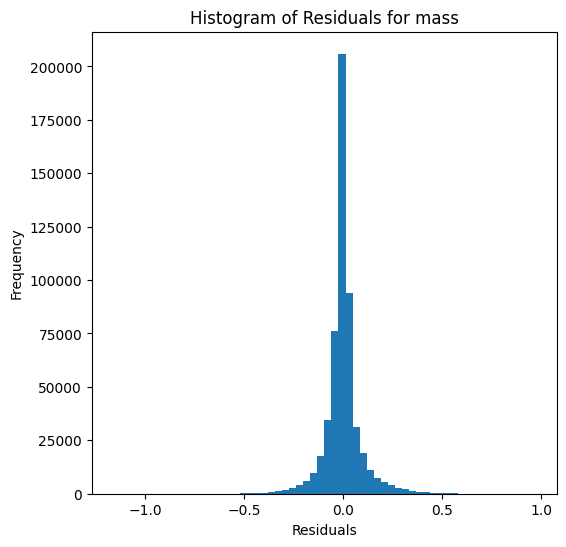

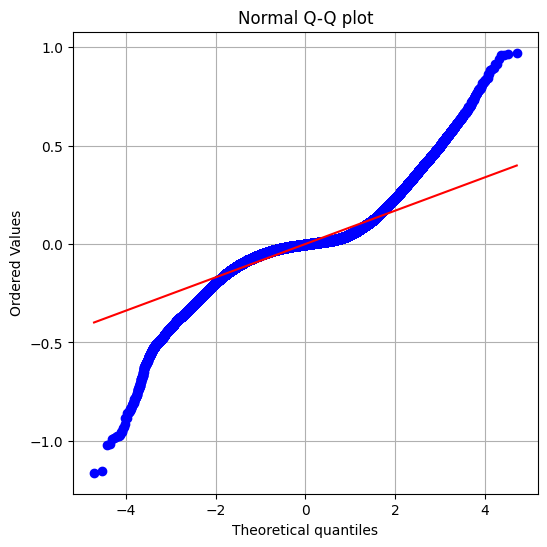


radius results:
RVE :  0.9997374331207423
RMSE :  0.01658239941408444
MAE :  0.011554286239594626
MedAE :  0.008178448361610302
CORR :  0.9998687083705904
MAX_ER :  0.17234105618015816
Percentiles : 
  75th percentile :  0.015199942140796452
  90th percentile :  0.02522669175591093
  95th percentile :  0.03413424251735102
  99th percentile :  0.05842059286578107



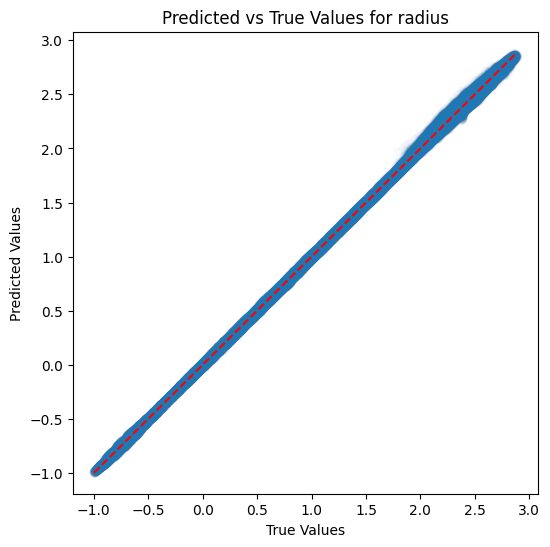

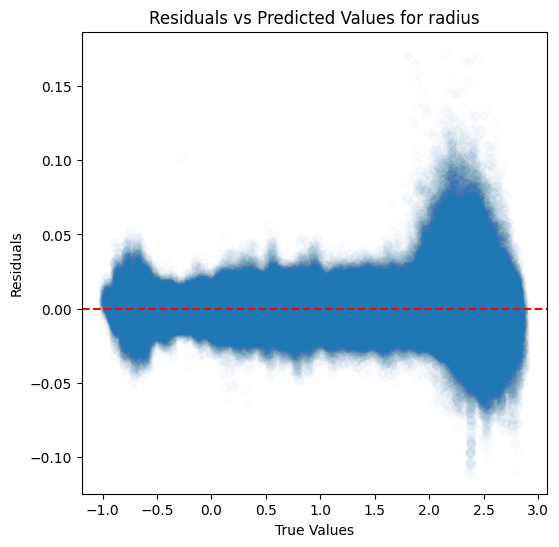

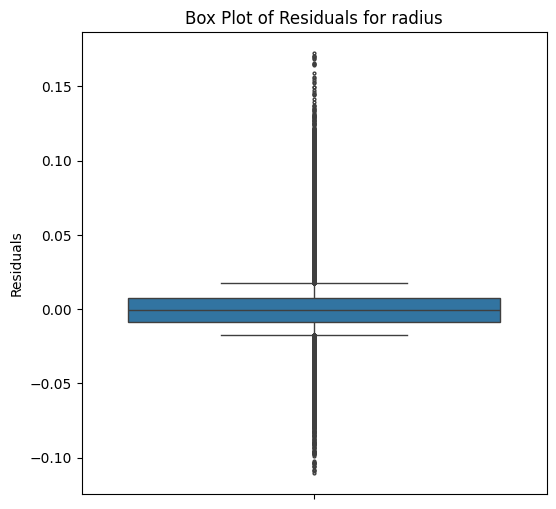

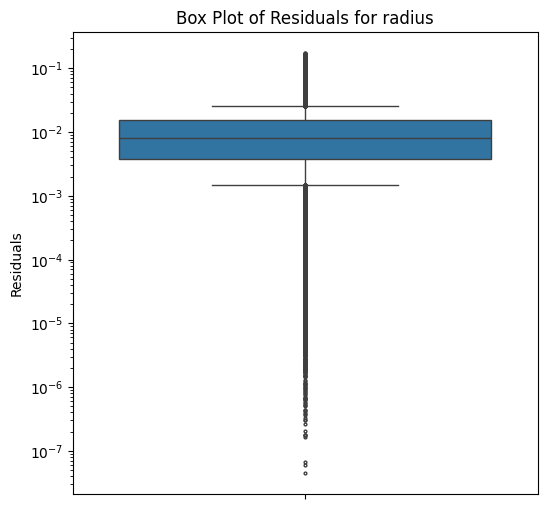

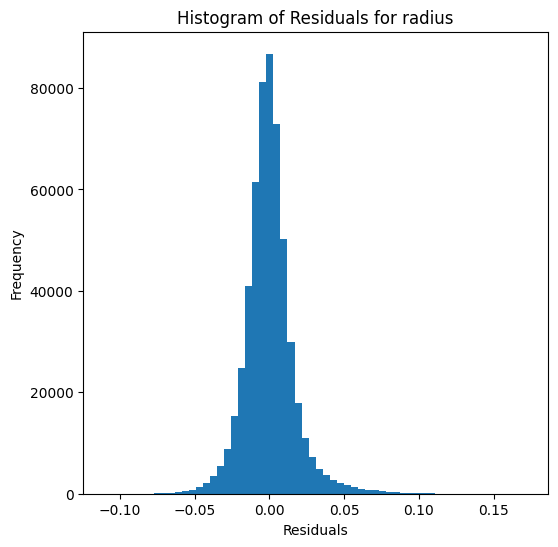

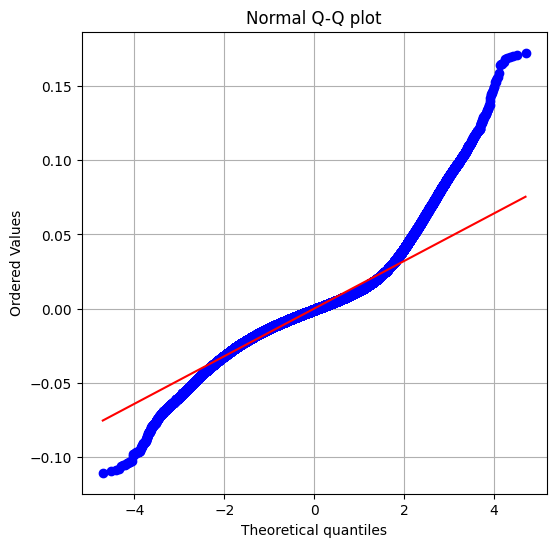

In [ ]:
xgb_evaluator.evaluate_Kfold_results(XGBRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False, n_jobs=5) #, override=False, use_preds=True)

### Multi-layer perceptron

In [ ]:
mlp_evaluator = Model_evaluator("mlp", path=path_to_results, physical_model=physical_model)


mass_filtered_smaller_3 train data :
split 1 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


0.0037162379870514448
2 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


0.003772082181021959
3 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


0.003724728081691509
4 0.0038526295341148446
5 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


0.0038549300450557537

mass results:
RVE :  0.9649058531577546
RMSE :  0.12947973708308194
MAE :  0.08171001400272891
MedAE :  0.048495481317905265
CORR :  0.9823117948691011
MAX_ER :  2.493348794595222
Percentiles : 
  75th percentile :  0.10175205306395813
  90th percentile :  0.19398735791558022
  95th percentile :  0.27779046484779985
  99th percentile :  0.4632703260294115



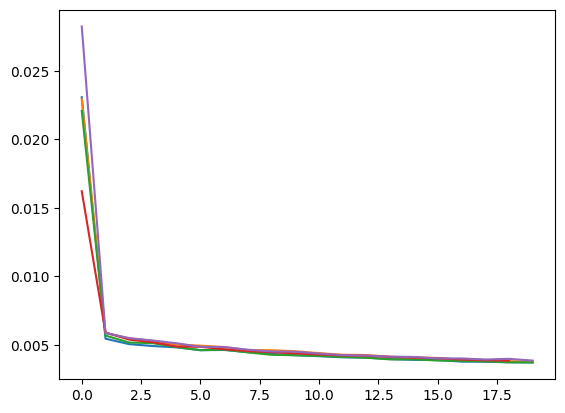

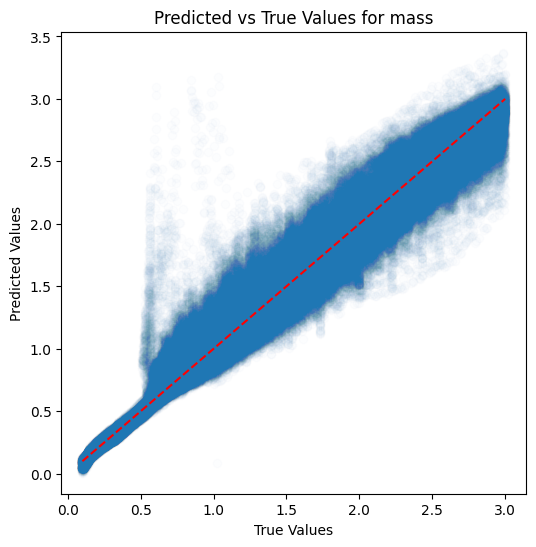

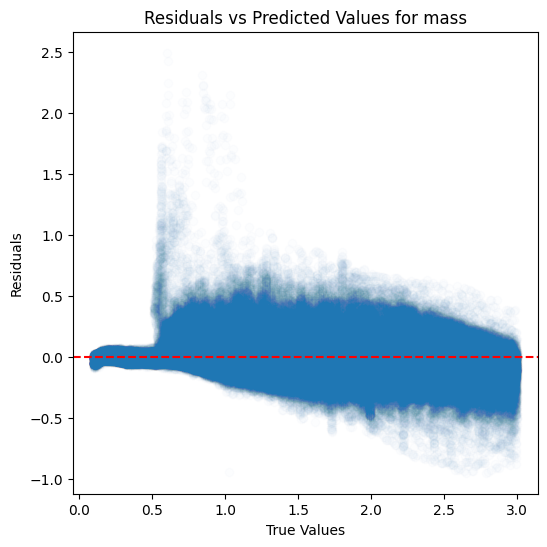

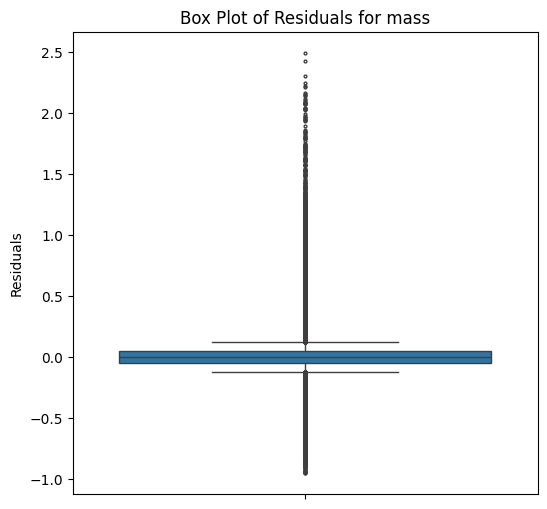

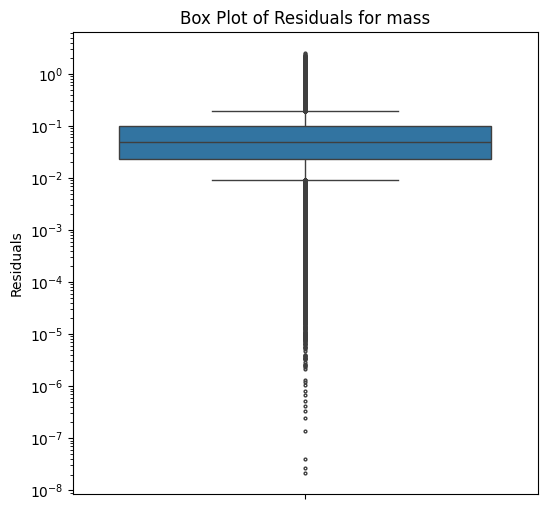

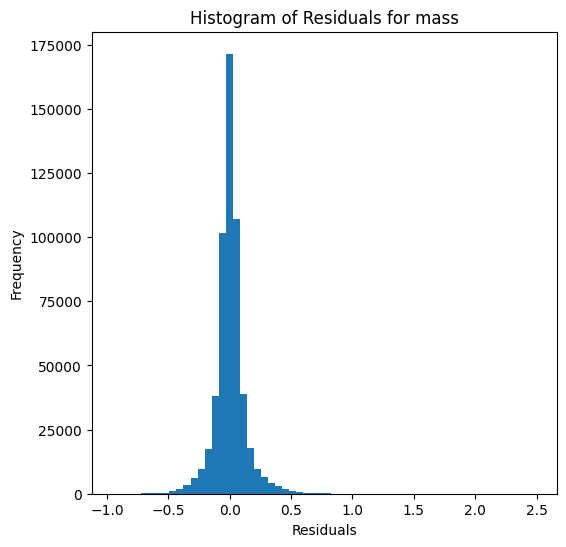

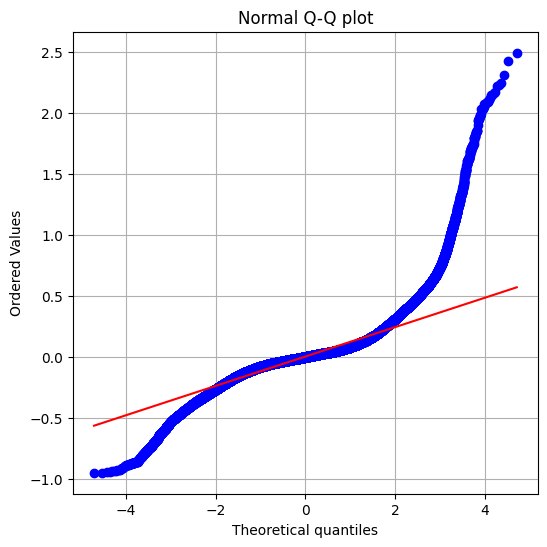


radius results:
RVE :  0.9994078667866224
RMSE :  0.02789966474335524
MAE :  0.02020179317089933
MedAE :  0.015852780427029645
CORR :  0.999703950192692
MAX_ER :  0.4480227615076733
Percentiles : 
  75th percentile :  0.027206807464281127
  90th percentile :  0.041631258936256854
  95th percentile :  0.053221552092105585
  99th percentile :  0.08471682532747069



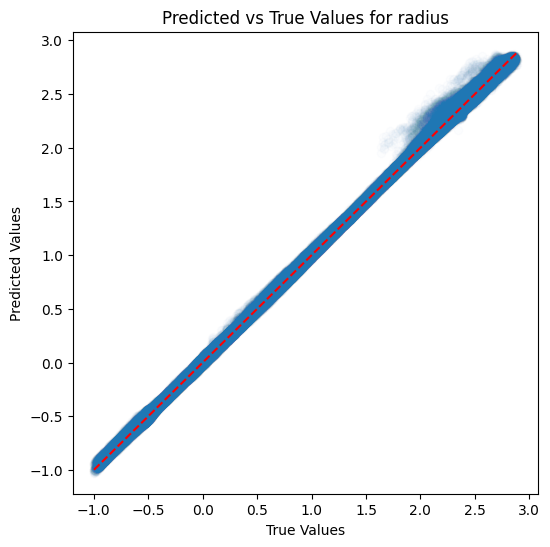

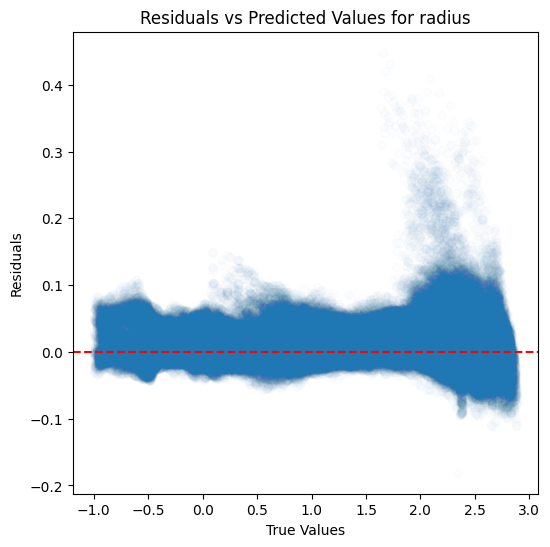

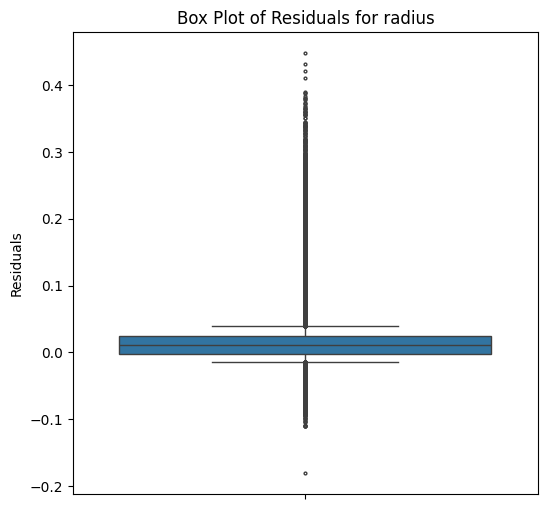

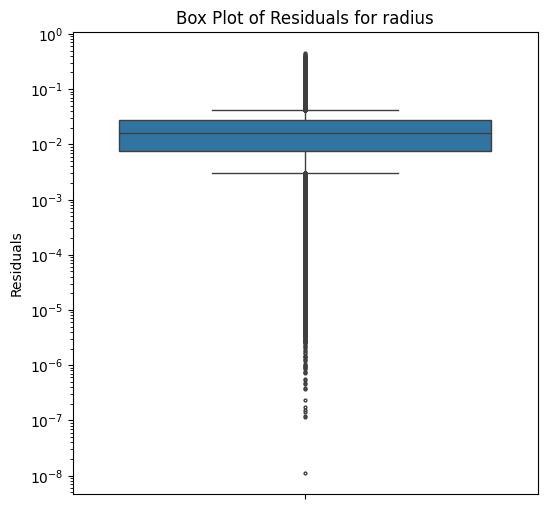

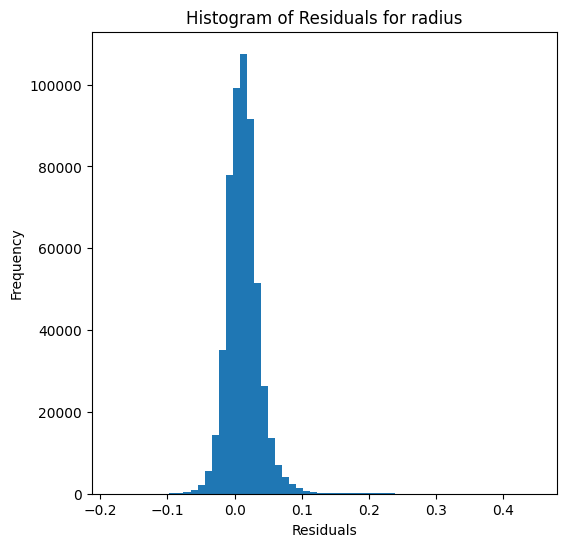

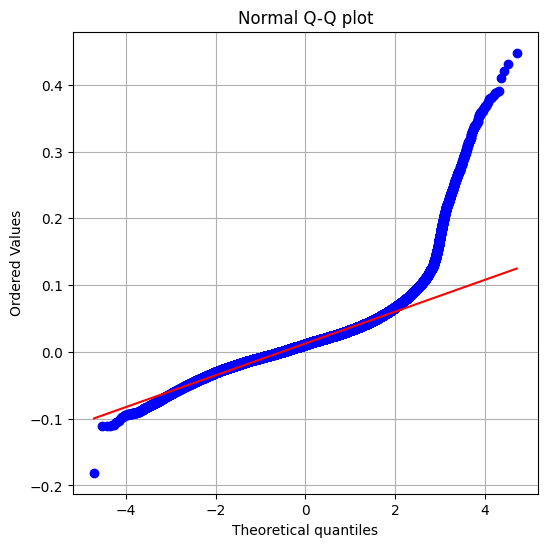

In [ ]:
mlp_evaluator.evaluate_Kfold_results(MLPRegressor, X_train, y_train, path_to_predictions, tag, n_splits=5, random_state=12, override=True, use_preds=False, hidden_layer_sizes = (100, 100, 100, 100), max_iter=20, batch_size=400) #, override=False, use_preds=True)